In [2]:
import pandas as pd
import numpy as np
from numpy import random
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib

In [3]:
complete_customer_data = pd.read_csv('Mall_Customers.csv')

In [4]:
customer_data = complete_customer_data.iloc[:,3:5]
samples, features = customer_data.shape
customer_datan=customer_data.to_numpy()

In [5]:
#mention no. of clusters
K = 5

In [6]:
#initialize centroid
def init_centroid(samples, features, customer_datan,K):
    centroid = []
    for i in range(K):
        rand = random.randint(samples)
        centroid.append(customer_datan[rand])
    return np.array(centroid)

In [7]:
#calculate distance for all
def cal_dist(customer_datan, samples, centroid, features, K):
    dist = np.zeros((samples, K))
    for k in range(K):
        for i in range(samples):
            sum = 0
            for j in range(features):
                sum+= (customer_datan[i][j] - centroid[k][j])**2
            dist[i][k] = sqrt(sum)
    return dist

In [8]:
#calculate new centroid
def cal_centroid(dataset,K,centroid):
    for i in range(K):
        rows = np.where(dataset[:,2]==i)
        centroid[i] = np.reshape((np.mean(dataset[rows],axis=0)),(1,3))[:,[0,1]]
    return centroid
    

In [14]:
centroid = init_centroid(samples, features,customer_datan,K)
dist = cal_dist(customer_datan, samples, centroid, features, K)
min_dist_index = np.reshape(np.argmin(dist, axis=1),(samples,1))
dataset = np.append(customer_datan,min_dist_index,axis=1)

for i in range(100):
    dist = cal_dist(customer_datan, samples, centroid, features, K)
    min_dist_index = np.reshape(np.argmin(dist, axis=1),(samples,1))
    dataset = np.append(customer_datan,min_dist_index,axis=1)
    centroid = cal_centroid(dataset,K,centroid)

    

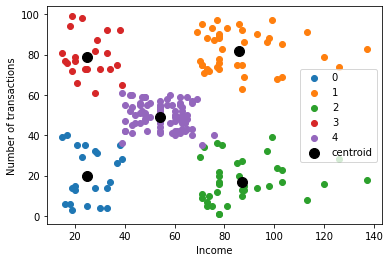

In [15]:
colors = ['red','green','blue','purple','pink']
for i in range(K):
    x=dataset[np.where(dataset[:,2]==i)]
    plt.scatter(x[:,0], x[:,1], label = i)
plt.scatter(centroid[:,0],centroid[:,1],s=100,c='black',label='centroid')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()

c:\users\mayuri.kadam\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\mayuri.kadam\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


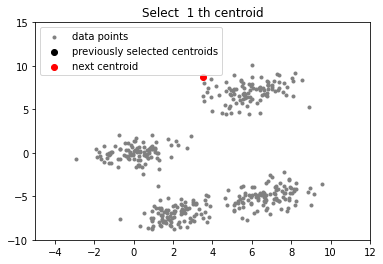

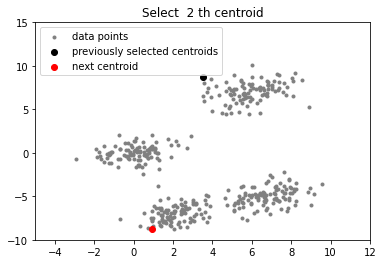

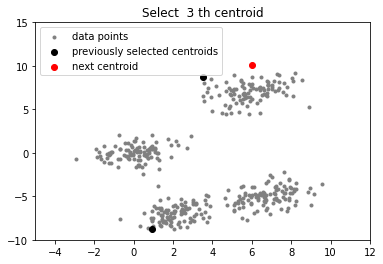

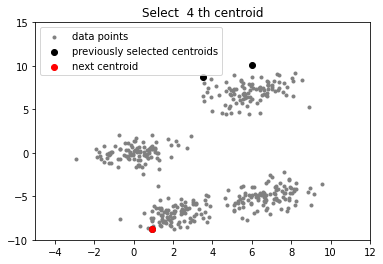

In [23]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# creating data
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

# function to plot the selected centroids
def plot(data, centroids):
	plt.scatter(data[:, 0], data[:, 1], marker = '.',
				color = 'gray', label = 'data points')
	plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
				color = 'black', label = 'previously selected centroids')
	plt.scatter(centroids[-1, 0], centroids[-1, 1],
				color = 'red', label = 'next centroid')
	plt.title('Select % d th centroid'%(centroids.shape[0]))
	
	plt.legend()
	plt.xlim(-5, 12)
	plt.ylim(-10, 15)
	plt.show()
		
# function to compute euclidean distance
def distance(p1, p2):
	return np.sum((p1 - p2)**2)

# initialization algorithm
def initialize(data, k):
	'''
	initialized the centroids for K-means++
	inputs:
		data - numpy array of data points having shape (200, 2)
		k - number of clusters
	'''
	## initialize the centroids list and add
	## a randomly selected data point to the list
	centroids = []
	centroids.append(data[np.random.randint(
			data.shape[0]), :])
	plot(data, np.array(centroids))

	## compute remaining k - 1 centroids
	for c_id in range(k - 1):
		
		## initialize a list to store distances of data
		## points from nearest centroid
		dist = []
		for i in range(data.shape[0]):
			point = data[i, :]
			d = sys.maxsize
			
			## compute distance of 'point' from each of the previously
			## selected centroid and store the minimum distance
			for j in range(len(centroids)):
				temp_dist = distance(point, centroids[j])
				
				d = min(d, temp_dist)
			dist.append(temp_dist)
			
		## select data point with maximum distance as our next centroid
		dist = np.array(dist)
		next_centroid = data[np.argmax(dist), :]
		centroids.append(next_centroid)
		dist = []
		plot(data, np.array(centroids))
	return centroids

# call the initialize function to get the centroids
centroids = initialize(data, k = 4)
